In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
#Here we define all the bulky functions that will be used later in the main code. 


#This function 'decides' what happens in the Gillespie algorythm depending on the output of the second random number.
def decider(random):
        if(0<=random<cltve[1]):
            LI.append(LI[i] + 60)
            XI.append(XI[i] + 60)
            EAi.append(EAi[i])
            CL.append(4000*sin(2*3.141592*T/1440)+4000 + r3)
        elif(cltve[1]<=random<cltve[2] and LI[i] != 0 ):
            LI.append(LI[i] - 1)
            XI.append(XI[i])
            EAi.append(EAi[i])
            CL.append(4000*sin(2*3.141592*T/1440)+4000 + r3)
        elif(cltve[2]<=random<cltve[3] and XI[i] != 0):
            LI.append(LI[i])
            XI.append(XI[i]-1)
            EAi.append(EAi[i])
            CL.append(4000*sin(2*3.141592*T/1440)+4000 + r3)
        elif(cltve[3]<=random<cltve[5]):
            EAi.append(EAi[i] + 60)
            LI.append(LI[i])
            XI.append(XI[i])
            CL.append(4000*sin(2*3.141592*T/1440)+4000 + r3)
        elif(cltve[5]<=random<cltve[6] and EAi[i]!=0):
            EAi.append(EAi[i] - 1)
            LI.append(LI[i])
            XI.append(XI[i])
            CL.append(4000*sin(2*3.141592*T/1440)+4000 + r3)
        else:
            LI.append(LI[i])
            XI.append(XI[i])
            EAi.append(EAi[i])
            CL.append(4000*sin(2*3.141592*T/1440)+4000 + r3)

#Since the Gillespie algorithm outputs an array with random time intervals. In order to do further useful 
#data manipulation, we need to standardize the arrays to a common time. This function standardizes the time 
#array - 't1' to an input interval - 'intervalo' and then associates the corresponding protein concentration
#of EAi for each time. 

def standardEAi (time, protein, intervalo):
    
    import math
    maxcasilla = len(time) -1
    maxtime = (math.ceil(time[maxcasilla]))
    i=0
    l=0
    while (i<=maxtime):
        mtime = 0
        mprot = 0
        h=0
        if(l!=0):
            h=l-2
        
        for j, k in zip(time[h:], protein[h:]):
            if(j>=i):
                break
            else:
                if(j>mtime and j>=(i-1)):
                    mtime = j
                    mprot = k
        if(mtime ==0 and i !=0):
            to.append(float(i))
            poEAi.append(float(poEAi[l-1]))
            
        elif(i!=0):
            to.append(float(i))
            poEAi.append(float(mprot))
        i+=intervalo
        l+=1

#This function is the same as the last one but averages the concentrations of LI instead of EAi
def standardLI (time, protein, intervalo):
    
    import math
    maxcasilla = len(time) -1
    maxtime = (math.ceil(time[maxcasilla]))
    i=0
    l=0
    while (i<=maxtime):
        mtime = 0
        mprot = 0
        h=0
        if(l!=0):
            h=l-2
        
        for j, k in zip(time[h:], protein[h:]):
            if(j>=i):
                break
            else:
                if(j>mtime and j>=(i-1)):
                    mtime = j
                    mprot = k
        if(mtime ==0 and i !=0):
            to.append(float(i))
            poLI.append(float(poLI[l-1]))
            
        elif(i!=0):
            to.append(float(i))
            poLI.append(float(mprot))
        i+=intervalo
        l+=1
#In the main part of the code, each standardized protein array is printed into a document - 'outprotLI.dat'
#and 'outprotEAi.dat'. Since we are interested in the average protein concentration, this function takes
#the averages from the outputs in the document 'outprotEAi.dat'


def aveprotEAi(fileinput):
    archivo = open(fileinput , 'r')
    output = open('aveprotEAi.dat', 'w')
    toline = archivo.readline()
    output.write(toline + '\n')
    outcontainer = []  
    toline = toline.split()
    for i in range(len(toline)):
        outcontainer.append(0.0)
  
    
    
    counter = 0
    for line in archivo:
        k = line.strip()
        columns = line.split()
        for i in range(len(columns)):
            outcontainer[i] = outcontainer[i] + float(columns[i])
            
            
            
        counter +=1
    for i in outcontainer:
        i = i/counter
        output.write(str(i) + '    ')
    output.write('\n')
    
    archivo.close()
    output.close()



In [14]:
"""lento = 0
for phi in range(1):
"""
   
    #The array t1 will contain all of the time intervals calculated with the tau formula
    t1 = [0.0] 

    #An array for each of the protein concentrations is initialized 
    LI = [0.0]
    XI=[0.0]
    CL=[0.0]
    EAi=[0.0]
    
    # All of the constants involved in the differetial equations are established here
    aCL = 0.0 
    bCL = 5.0
    nCL = 2.0
    kCL = 3000.0
    gXI = 0.033
    gLI = 0.033
    aL = 1.0
    bL = 5.0
    kL = 3000.0
    nL = 2.0
    gEAi =  0.033
"""
    to = [0.0]
    poEAi = [0.0]
    poLI = [0.0]
"""


    # This for loop iterates for 800'000 events. Each run-through, a time interval is calculated and added
    #to the time array and each protein array is updated.
    for i in range(800000):

        ks=[]
        cltve=[]

        #LI events
        k0 = aCL
        k1 = ((bCL*pow(CL[i],nCL))/(pow(CL[i],nCL)+pow(kCL,nCL)))
        k2 = gLI*LI[i]
        ks.append(k0)
        ks.append(k1)
        ks.append(k2)

        #XI Events
        k3 = gXI*XI[i]
        ks.append(k3)


        #EAi Events
        k4 = aL
        k5 = (bL/(1+pow((LI[i]/kL),nL)))
        k6 = gEAi*EAi[i]
        ks.append(k4)
        ks.append(k5)
        ks.append(k6)
        
        #s will represent the sum of all events
        
        s=0

        for j in ks:
                 s = s+j
        
        for j in range(len(ks)):
            if(j==0):
                cltve.append(ks[0]/s)
            else:
                cltve.append(cltve[j-1] + ks[j]/s)

        r1 = random.random()
        
        #We calculate the time interval for the next event to happen
        
        T = (1/s)*log(1/r1) + t1[i]
        
        #The time interval is added to the time array
        
        t1.append(T)
        
        #This random number will decide which event is chosen.
        
        r2 = random.random()
        
        #This random number is used to generate some noise in the input signal. 
        
        r3 = (random.random()*1000)-500
        
        #This recalls the function to decide which event happens. 
        
        decider(r2)

"""  
     standardEAi(t1, EAi, 0.5)
    to = [0.0]
    standardLI(t1, LI, 0.5)
  
    
    if(phi==0):
        
        lento = len(to)
        
        firstoutEAi = open('outprotEAi.dat', 'w')
        for i in to:
            firstoutEAi.write(str(i) + '    ')
        firstoutEAi.write('\n')
        for i in poEAi:
            firstoutEAi.write(str(i) + '    ')
        firstoutEAi.write('\n')
        firstoutEAi.close()
        
        firstoutLI = open('outprotLI.dat', 'w')
        for i in to:
            firstoutLI.write(str(i) + '    ')
        firstoutLI.write('\n')
        for i in poLI:
            firstoutLI.write(str(i) + '    ')
        firstoutLI.write('\n')
        firstoutLI.close()

    else:
        secondoutEAi = open('outprotEAi.dat' ,'a')
        for i in poEAi:
            secondoutEAi.write(str(i)+'    ')
        secondoutEAi.write('\n')
        secondoutEAi.close()
        
        secondoutLI = open('outprotLI.dat' ,'a')
        for i in poLI:
            secondoutLI.write(str(i)+'    ')
        secondoutLI.write('\n')
        secondoutLI.close()
        
aveprotEAi('outprotEAi.dat')
"""



"  \n     standardEAi(t1, EAi, 0.5)\n    to = [0.0]\n    standardLI(t1, LI, 0.5)\n  \n    \n    if(phi==0):\n        \n        lento = len(to)\n        \n        firstoutEAi = open('outprotEAi.dat', 'w')\n        for i in to:\n            firstoutEAi.write(str(i) + '    ')\n        firstoutEAi.write('\n')\n        for i in poEAi:\n            firstoutEAi.write(str(i) + '    ')\n        firstoutEAi.write('\n')\n        firstoutEAi.close()\n        \n        firstoutLI = open('outprotLI.dat', 'w')\n        for i in to:\n            firstoutLI.write(str(i) + '    ')\n        firstoutLI.write('\n')\n        for i in poLI:\n            firstoutLI.write(str(i) + '    ')\n        firstoutLI.write('\n')\n        firstoutLI.close()\n\n    else:\n        secondoutEAi = open('outprotEAi.dat' ,'a')\n        for i in poEAi:\n            secondoutEAi.write(str(i)+'    ')\n        secondoutEAi.write('\n')\n        secondoutEAi.close()\n        \n        secondoutLI = open('outprotLI.dat' ,'a')\n     

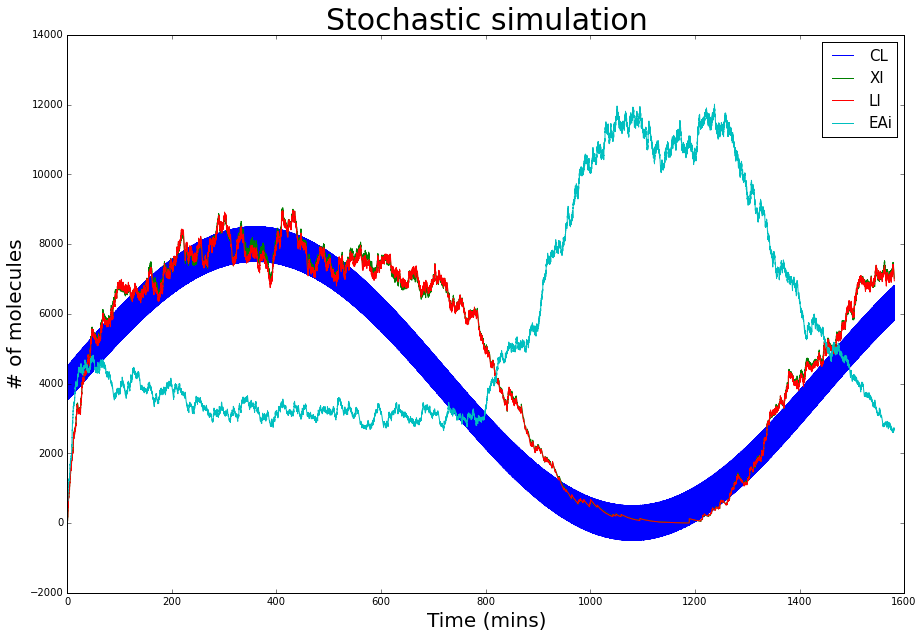

In [20]:
figure(figsize(15,10))
plot(t1,CL,label='CL')
plot(t1,XI,label='XI')
plot(t1,LI,label='LI')
plot(t1,EAi,label='EAi')
plt.xlabel('Time (mins)', fontsize = 20)
plt.ylabel('# of molecules' , fontsize = 20)
plt.title('Stochastic simulation', fontsize = 30)
legend(fontsize = 15)
savefig('cyano.png')
show()

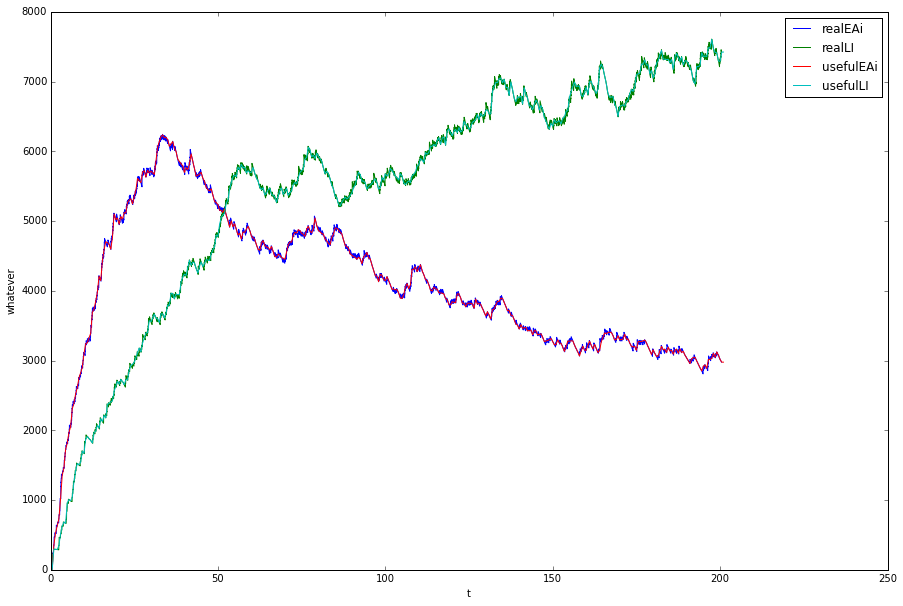

In [96]:
plot(t1,EAi,label='realEAi')
plot(t1,LI,label='realLI')
plot(to, poEAi, label='usefulEAi')
plot(to, poLI, label='usefulLI')
plt.xlabel('t')
plt.ylabel('whatever')
legend()
figure(figsize(15,10))